##**Support Vector Machine**

### Generate a random dataset that follows quadratic distribution.

In [ ]:


def generate_random_dataset(size):
  
    x = []
    y = []
    target = []    
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)        
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)        
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)    
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)    
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

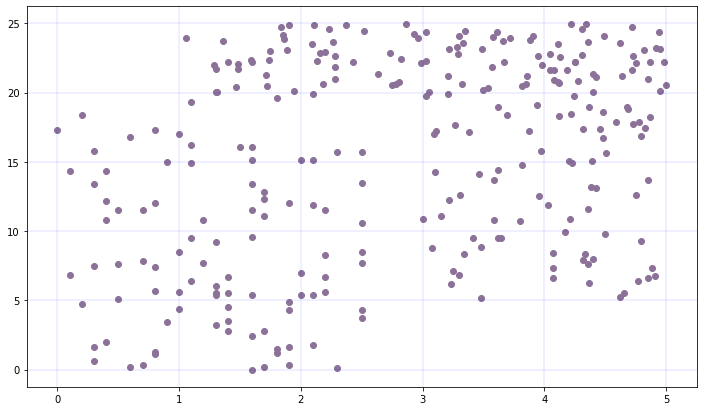

In [ ]:
# Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='blue', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")

plt.show()

In [ ]:
dataset

,x,y,target
0,1.50,16.10,0
1,2.52,24.42,1
2,4.23,14.88,1
3,1.70,0.20,0
4,2.16,22.82,1
...,...,...,...
295,2.45,20.49,1
296,4.05,7.44,1
297,2.00,17.60,0
298,1.25,21.86,1


### SVM with polynomial of degree 2 curve

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train) 

SVC(degree=2, kernel='poly')

In [ ]:
#who all are the support vectors from the dataset(whose alpha values are grater than zero)
model.support_vectors_

array([[ 1.5 , 16.1 ],
       [ 1.7 , 12.3 ],
       [ 2.5 ,  7.7 ],
       [ 2.5 , 10.6 ],
       [ 2.1 ,  5.4 ],
       [ 1.6 , 11.5 ],
       [ 1.1 ,  9.5 ],
       [ 1.6 ,  9.6 ],
       [ 2.5 ,  8.5 ],
       [ 0.6 , 16.8 ],
       [ 0.8 , 12.  ],
       [ 2.1 , 19.9 ],
       [ 2.2 ,  8.3 ],
       [ 1.1 , 14.9 ],
       [ 1.1 , 19.3 ],
       [ 1.7 , 11.1 ],
       [ 2.  ,  7.  ],
       [ 2.2 ,  5.6 ],
       [ 0.8 , 17.3 ],
       [ 2.3 , 15.7 ],
       [ 2.2 ,  6.7 ],
       [ 1.1 , 16.2 ],
       [ 0.2 , 18.4 ],
       [ 1.6 , 13.4 ],
       [ 1.7 , 12.8 ],
       [ 0.3 , 15.8 ],
       [ 2.2 , 11.5 ],
       [ 1.3 ,  9.2 ],
       [ 2.5 ,  4.3 ],
       [ 2.5 , 15.7 ],
       [ 1.2 , 10.8 ],
       [ 2.  , 15.1 ],
       [ 1.  , 17.  ],
       [ 2.1 , 11.9 ],
       [ 1.6 , 15.1 ],
       [ 0.9 , 15.  ],
       [ 2.5 , 13.5 ],
       [ 1.6 , 16.1 ],
       [ 1.9 , 12.  ],
       [ 2.  ,  5.4 ],
       [ 1.8 , 19.6 ],
       [ 2.1 , 15.1 ],
       [ 1.47, 20.39],
       [ 3.

In [ ]:
#Gives number of support vectors
model.n_support_

array([42, 42], dtype=int32)

In [ ]:
#Index of the support vectors from the dataset
model.support_

array([  0,  12,  15,  24,  33,  42,  45,  51,  54,  57,  60,  69,  72,
        75,  78,  81,  84,  90,  99, 105, 123, 126, 129, 135, 147, 159,
       162, 174, 177, 180, 183, 189, 195, 198, 201, 216, 231, 234, 243,
       258, 261, 264,  13,  23,  25,  26,  29,  34,  35,  52,  59,  61,
        62,  68,  71,  95, 107, 113, 116, 124, 125, 128, 142, 155, 157,
       167, 179, 185, 194, 215, 218, 221, 224, 230, 244, 245, 247, 248,
       251, 266, 269, 271, 275, 278], dtype=int32)

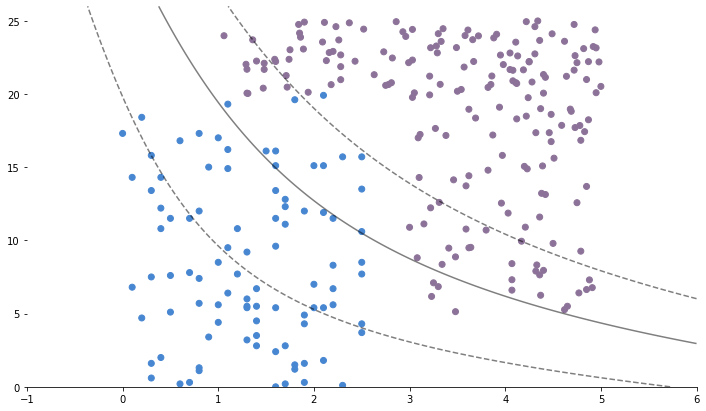

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=0, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy : " + str(accuracy_poly))
predictions_poly

2nd degree polynomial Kernel
Accuracy : 0.9


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

### SVM with linear curve

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train) 

SVC(kernel='linear')

In [ ]:
#who all are the support vectors from the dataset(whose alpha values are grater than zero)
model.support_vectors_

array([[ 1.5 , 16.1 ],
       [ 2.5 , 10.6 ],
       [ 2.5 ,  8.5 ],
       [ 2.1 , 19.9 ],
       [ 1.1 , 19.3 ],
       [ 2.3 , 15.7 ],
       [ 2.2 , 11.5 ],
       [ 2.5 , 15.7 ],
       [ 2.  , 15.1 ],
       [ 2.1 , 11.9 ],
       [ 1.6 , 15.1 ],
       [ 2.5 , 13.5 ],
       [ 1.6 , 16.1 ],
       [ 1.8 , 19.6 ],
       [ 2.1 , 15.1 ],
       [ 1.47, 20.39],
       [ 3.  , 10.89],
       [ 1.29, 22.02],
       [ 3.08,  8.81],
       [ 3.34,  8.36],
       [ 1.3 , 20.05],
       [ 3.3 ,  6.84],
       [ 1.4 , 22.24],
       [ 1.48, 21.67],
       [ 3.25,  7.1 ],
       [ 1.06, 23.97],
       [ 1.3 , 21.68],
       [ 3.23,  6.17],
       [ 3.48,  5.13],
       [ 1.31, 20.03]])

In [ ]:
#Gives number of support vectors
model.n_support_

array([15, 15], dtype=int32)

In [ ]:
#Index of the support vectors from the dataset
model.support_

array([  0,  24,  54,  69,  78, 105, 162, 180, 189, 198, 201, 231, 234,
       261, 264,  13,  23,  25,  68, 113, 124, 125, 142, 157, 179, 244,
       247, 251, 269, 271], dtype=int32)

In [ ]:
predictions_linear = model.predict(x_test)
accuracy_linear = accuracy_score(y_test, predictions_linear)
print(accuracy_linear)

0.95


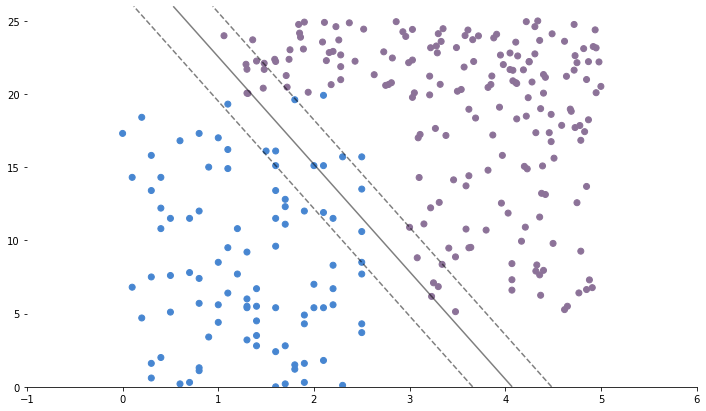

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=0, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Non-Linear SVM to Linear SVM Transformation

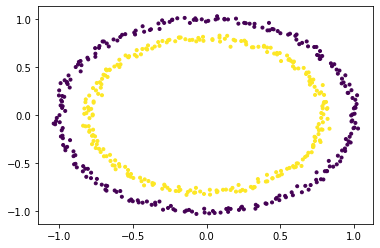

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore") 

# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02) 

# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

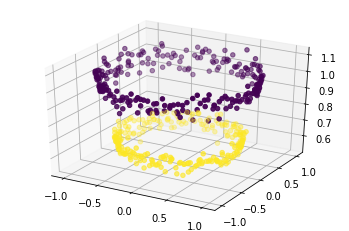

In [ ]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 
  
# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 

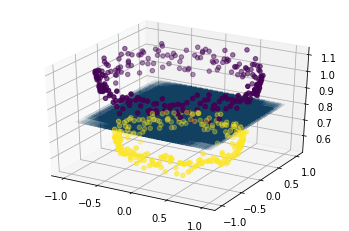

In [ ]:
from sklearn import svm 
svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 
  
# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 

In [ ]:
w,b

(array([[-3.76208548e-02,  3.09681548e-03, -7.30829110e+00]]),
 array([5.9666413]))

In [ ]:
support_vector = svc.support_vectors_
support_vector.shape

(61, 3)

In [ ]:
support_vector[1:10,]

array([[ 0.61380397, -0.73935701,  0.9234041 ],
       [ 0.76616777,  0.58602283,  0.9304358 ],
       [-0.75258732,  0.60791109,  0.93594357],
       [-0.11285776,  0.96044017,  0.9351822 ],
       [-0.80352885, -0.55809546,  0.95712915],
       [ 0.74494918, -0.5945293 ,  0.90841436],
       [ 0.62779971,  0.73933594,  0.94075011],
       [-0.85210587,  0.45606626,  0.93408086],
       [ 0.91463865,  0.3309602 ,  0.94609851]])

In [ ]:
svc.n_support_

array([30, 31], dtype=int32)